# Simple Linear Regression

- Use scikit-learn to implement linear regression
- Create a model, train it, test it, and use the model

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sns
%matplotlib inline
# Above line prevents plot from opening in separate windows, opens in the same window instead

<strong><u>STEPS</u>:</strong>

<ol>
<li> Importing Needed Packages
<li> Downloading Data
<li> Understanding the Data
<li> Reading the data in
<li> Data Exploration
<li> Creating tain and test dataset
<li> Train data distribution
<li> Modeling
<li> Plot outputs
<li> Evaluation
</ol>

In [15]:
dfa = pd.read_csv("..//..//csv_datasets//sReg_FuelConsumptionCo2.csv")

dfa.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [16]:
dfa.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Exploring some features

In [18]:
dfb = dfa[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dfb.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


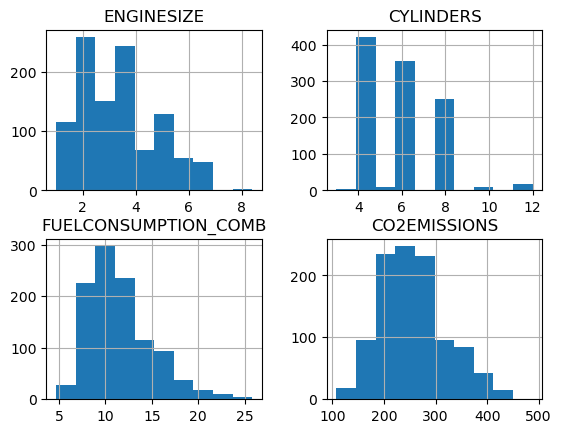

In [21]:
dfb.hist()
plt.show()

### Exploring Linear Relationships between features and the Emission response variable

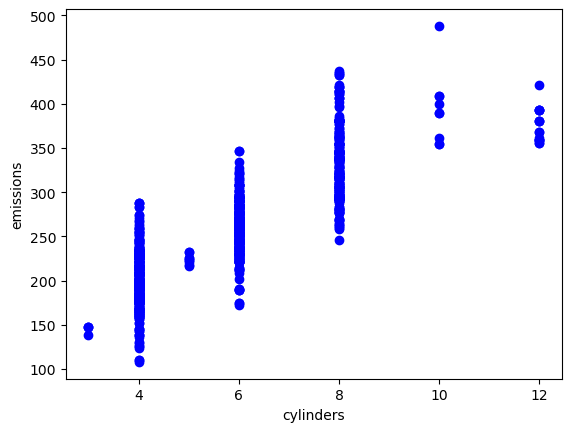

In [ ]:
# Cylinder Feature -> Emission

plt.scatter(dfb['CYLINDERS'], dfb['CO2EMISSIONS'], color='blue')
plt.xlabel('cylinders')
plt.ylabel('emissions')
plt.show()

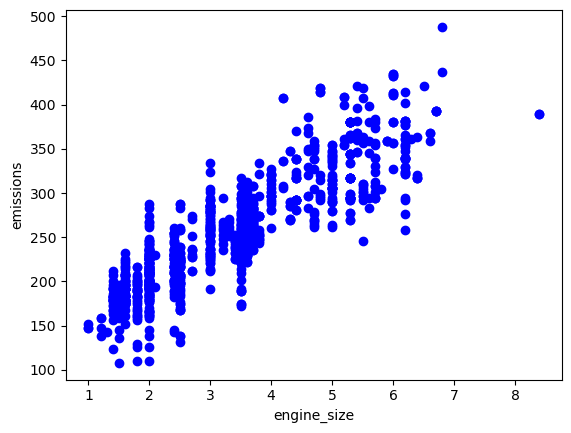

In [ ]:
# Engine Size Feature -> Emission

plt.scatter(dfb['ENGINESIZE'], dfb['CO2EMISSIONS'], color='blue')
plt.xlabel('engine_size')
plt.ylabel('emissions')
plt.show()

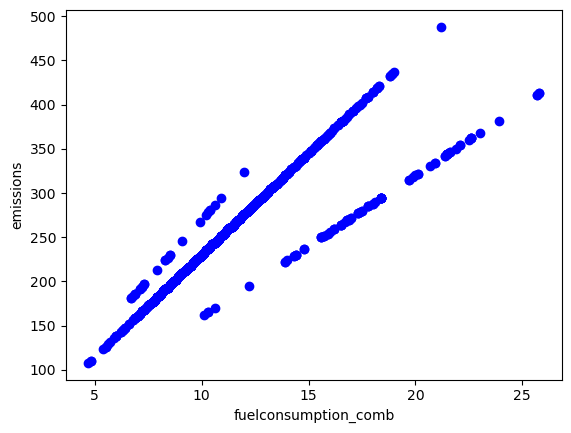

In [36]:
# Fuel Consumption Combination -> Emission

plt.scatter(dfb['FUELCONSUMPTION_COMB'], dfb['CO2EMISSIONS'], color='blue')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('emissions')
plt.show()

From the above distributions, the best choice would be <strong>Feature C</strong> i.e. <strong>'fuelconsumption_comb'</strong> as it provides the strongest and most straightforward linear relationship with emissions, most likely resulting in a more accurate linear regression model

You would pick another feature e.g. <strong>Feature B</strong> when fuel consumption data is unavailable, less reliable, or when you are building a more comprehensive model that benefits from multiple predictors

<strong>Feature A</strong> presents as such as it is a discrete distribution, emphasizing the importance of examining/inspecting the data prior to building out your model.

#### Creating train and test datasets

In [ ]:
msk = np.random.rand(len(dfa)) < 0.8 # Generates mask from floats 0-1, for boolean masking to extract a range of values based on a condition
train = dfb[msk]
test = dfb[~msk] # ~ is used to invert the boolean mask created in the first line

##### Testing/Examining the Data

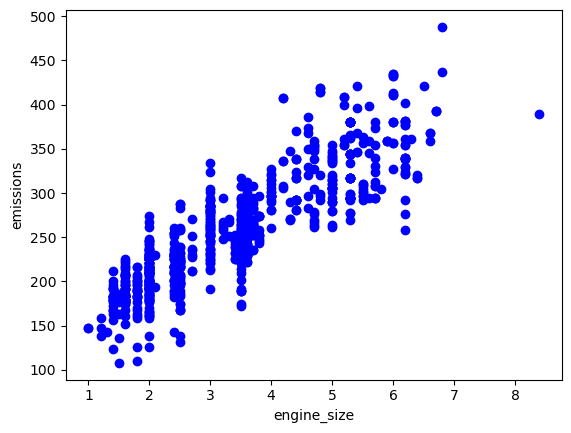

In [ ]:
# Selected engine size due to variability in distribution

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
plt.xlabel('engine_size')
plt.ylabel('emissions')
plt.show()

##### Modeling

In [62]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

## 'np.asanyarray' ensures the data is converted into a NumPy array (if it isn't one already) before fitting the model
## It was often a common practice in older code to ensure compatibility, especially if certain steps expected strictly NumPy arrays rather than DataFrames

# Coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.07101184]]
Intercept:  [125.88275697]


Plotting the outputs

Text(0, 0.5, 'Emission')

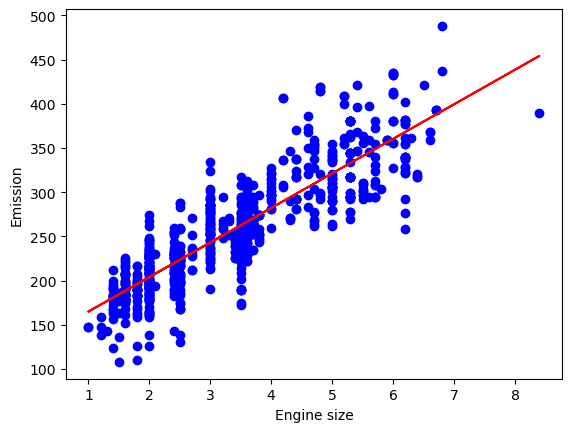

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 22.64
Residual sum of squares (MSE): 904.57
R2-score: 0.77


### Training the model using <code>fuelconsumption_comb</code>

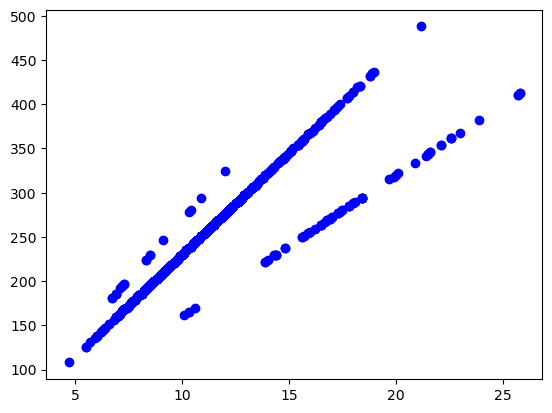

In [74]:
# Generated mask to boolean separate data into test and train sets
msk_1 = np.random.rand((len(dfb))) < 0.75

# Separating datasets into test and train sets
train_1 = dfb[msk_1]
test_1 = dfb[~msk]

## Organize independent variables and dependent variables from datasets
train_x1 = train_1[['FUELCONSUMPTION_COMB']]
train_y1 = train_1[['CO2EMISSIONS']]
test_x1 = test_1[['FUELCONSUMPTION_COMB']]
test_y1 = test_1[['CO2EMISSIONS']]

# Checking relationship between response variable and independent variable from training set
plt.scatter(train_1['FUELCONSUMPTION_COMB'], train_1['CO2EMISSIONS'], color='blue')
plt.show()

In [83]:
# Modelling

## Generated Linear Regression Model
regr_1 = linear_model.LinearRegression()

## Teach model for future use case
regr_1.fit(train_x1, train_y1)

# Show coefficient and intercept
print(f"Fuel Consmption Combination\n----------------------------\n- Coefficient: {regr_1.coef_}\n- Intercept:{regr_1.intercept_}\n\n\n"
      f"Engine Size\n------------\n- Coefficient: {regr.coef_}\n- Intercept: {regr.intercept_}")

Fuel Consmption Combination
----------------------------
- Coefficient: [[16.18787616]]
- Intercept:[68.08790759]


Engine Size
------------
- Coefficient: [[39.07101184]]
- Intercept: [125.88275697]


In [82]:
# Testing out the model

## Test
prediction_regr_1 = regr_1.predict(test_x1)

# Comparing tests between Fuel Consumption and Engine Size
print(f'Prediction using Fuel Consumption Combination: {np.mean(np.absolute(prediction_regr_1 - test_y1))}')
print(f'Prediction using Engine Size: {np.mean(np.absolute(test_y_ - test_y))}')

Prediction using Fuel Consumption Combination: 19.72860602253498
Prediction using Engine Size: 22.638312195504508


In [84]:
# Evaluation

print(f'Mean Absolute Error via Engine Size: {np.mean(np.abs(test_y_ - test_y))} | R-Score: {r2_score(test_y_, test_y)}')
print(f'Mean Absolute Error via Fuel Consumption Combination: {np.mean(np.abs(prediction_regr_1 - test_y1))} | R-Score: {r2_score(prediction_regr_1, test_y1)}')

Mean Absolute Error via Engine Size: 22.638312195504508 | R-Score: 0.7055378701289265
Mean Absolute Error via Fuel Consumption Combination: 19.72860602253498 | R-Score: 0.7633999205002822
